In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK, Roots;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
3e21 * 0.001, # Doping states' density (cm^-3)
0.29 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.62, # Fermi level (J)
0.1, # Intrinsic semiconductor's gaussian width (J)
0.1, # Doping states' gaussian width (J)
);

F = -5.3e4; # Field (V.cm^-1)
T = 300;

In [2]:
ratio = [0.001 * i for i in 0:1:6];
res = []
range_u = -25:0.5:25;
for i in ratio
    res_partial = [];
    semiconductor.Nd = semiconductor.Ni * i;
    for u in range_u
        append!(res_partial, Conduction.t(semiconductor, u, T, F));
    end

    append!(res, [res_partial]);
end


In [26]:
label_n = Matrix{String}(undef, 1, length(ratio[1:2:end]));
for i in 1:length(ratio[1:2:end])
    label_n[1, i] = "Doping: " * string(ratio[1:2:end][i] * 100) * "%";
end

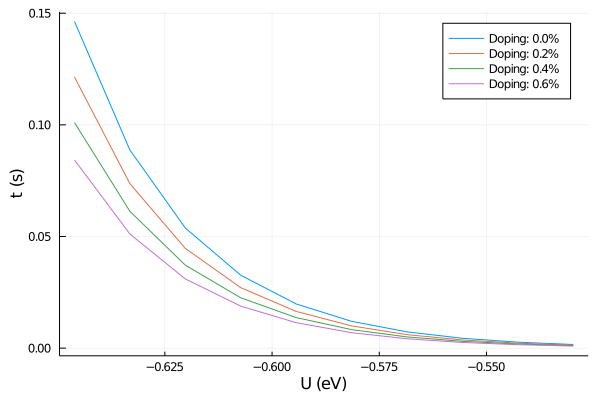

In [30]:
plot(range_u[1:10] .* (Conduction.k * T / Conduction.ev), [i[1:10] for i in res[1:2:end]], label=label_n, xlabel="U (eV)", ylabel="t (s)")

In [31]:
using CSV, DataFrames;

In [34]:
df = DataFrame(r = range_u,
t_0 = res[1],
t_01 = res[2],
t_02 = res[3],
t_03 = res[4],
t_04 = res[5],
t_05 = res[6],
t_06 = res[7]);

CSV.write("t_doped_alpha_npd_Ni3e21_F5-3e4.csv", df)

"t_doped_alpha_npd_Ni3e21_F5-3e4.csv"

In [35]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
3e21 * 0.001, # Doping states' density (cm^-3)
0.29 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.62, # Fermi level (J)
0.1, # Intrinsic semiconductor's gaussian width (J)
0.1, # Doping states' gaussian width (J)
);

function quantityCarrier(x)
    semiconductor.Ni = x;
    return p()
end

function find_multiple_zeros(x)
    density = (r -> find_zero(z -> quantityCarrier(z) - r, 1e20)).(x)
    return density
end

p() = quadgk(
    r -> Conduction.DOS(semiconductor, r, T) * Conduction.F(semiconductor, r, T) * Conduction.k * T,
    -Inf,
    Inf
)[1];

range = vcat([[1, 4, 6, 8] * 10^i for i in 14:14]...)

densities = find_multiple_zeros(range);
res_t_charge = [];

for d in densities
    res_partial = [];
    for u in range_u
        semiconductor.Ni = d;
        append!(res_partial, Conduction.t(semiconductor, u, T, F));
    end
    append!(res_t_charge, [res_partial]);
end